## Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
domestic=pd.read_csv('domestic_visitors_2016.csv')

In [3]:
dom_17=pd.read_csv('domestic_visitors_2017.csv')

In [4]:
dom_18=pd.read_csv('domestic_visitors_2018.csv')

In [5]:
dom_19=pd.read_csv('domestic_visitors_2019.csv')

In [6]:
foreign=pd.read_csv('foreign_visitors_2016.csv')

In [7]:
fore_17=pd.read_csv('foreign_visitors_2017.csv')

In [8]:
fore_18=pd.read_csv('foreign_visitors_2018.csv')

In [9]:
fore_19=pd.read_csv('foreign_visitors_2019.csv')

## Data Merging (Domestic)

In [10]:
domestic.shape

(372, 5)

In [11]:
domestic=pd.concat([domestic,dom_17,dom_18,dom_19],ignore_index=True)

In [12]:
domestic.shape

(1512, 5)

In [13]:
domestic

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,389010
1508,Yadadri Bhongir,01-09-2019,September,2019,366862
1509,Yadadri Bhongir,01-10-2019,October,2019,381860
1510,Yadadri Bhongir,01-11-2019,November,2019,365990


In [14]:
domestic.to_csv("domestic_visitors_16-19.csv")

## Data Merging (Foreign)

In [15]:
foreign.shape

(372, 5)

In [16]:
foreign=pd.concat([foreign,fore_17,fore_18,fore_19],ignore_index=True)

In [17]:
foreign.shape

(1512, 5)

In [18]:
foreign

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,2
1,Adilabad,01-02-2016,February,2016,0
2,Adilabad,01-03-2016,March,2016,2
3,Adilabad,01-04-2016,April,2016,0
4,Adilabad,01-05-2016,May,2016,0
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,0
1508,Yadadri Bhongir,01-09-2019,September,2019,0
1509,Yadadri Bhongir,01-10-2019,October,2019,0
1510,Yadadri Bhongir,01-11-2019,November,2019,0


In [19]:
foreign.to_csv("foreign_visitors_16-19.csv")

## Data Cleaning (Domestic)

In [20]:
domestic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1482 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


In [21]:
domestic.isnull().sum()

district     0
date         0
month        0
year         0
visitors    30
dtype: int64

In [22]:
domestic.replace([" ",np.nan], 0, inplace=True)

In [23]:
domestic["visitors"] = domestic["visitors"].astype("int64")

In [24]:
domestic.duplicated().sum()

0

In [25]:
domestic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 59.2+ KB


In [26]:
domestic.shape

(1512, 5)

## Data Cleaning (Foreign)

In [27]:
foreign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


In [28]:
foreign["visitors"] = foreign["visitors"].replace(" ",0)

In [29]:
foreign["visitors"] = foreign["visitors"].astype("int64")

In [30]:
foreign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 59.2+ KB


##  ----------------------------------------------------------------------------------------- 

In [31]:
df = pd.DataFrame({"foreign":foreign.groupby("district")["visitors"].sum()})

In [32]:
df

,foreign
district,
Adilabad,32
Bhadradri Kothagudem,0
Hyderabad,1044898
Jagtial,0
Jangaon,2
Jayashankar Bhoopalpally,1252
Jogulamba Gadwal,945
Kamareddy,0
Karimnagar,0


In [33]:
df["domestic"]=domestic.groupby("district")["visitors"].sum()

In [34]:
df

,foreign,domestic
district,,
Adilabad,32,7321575.0
Bhadradri Kothagudem,0,21600962.0
Hyderabad,1044898,83900960.0
Jagtial,0,11303514.0
Jangaon,2,826280.0
Jayashankar Bhoopalpally,1252,19632865.0
Jogulamba Gadwal,945,6813340.0
Kamareddy,0,1773.0
Karimnagar,0,9462383.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Adilabad to Yadadri Bhongir
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   foreign   33 non-null     int64  
 1   domestic  32 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 792.0+ bytes


In [36]:
df.isnull().sum()

foreign     0
domestic    1
dtype: int64

In [37]:
df["domestic"] = df["domestic"].replace(np.nan, 0)

In [38]:
df["domestic"] = df["domestic"].astype("int64")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Adilabad to Yadadri Bhongir
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   foreign   33 non-null     int64
 1   domestic  33 non-null     int64
dtypes: int64(2)
memory usage: 792.0+ bytes


In [40]:
domestic.to_csv("domestic_visitors.csv")

In [41]:
foreign.to_csv("foreign_visitors.csv")

In [42]:
domestic.shape

(1512, 5)

In [43]:
df

,foreign,domestic
district,,
Adilabad,32,7321575
Bhadradri Kothagudem,0,21600962
Hyderabad,1044898,83900960
Jagtial,0,11303514
Jangaon,2,826280
Jayashankar Bhoopalpally,1252,19632865
Jogulamba Gadwal,945,6813340
Kamareddy,0,1773
Karimnagar,0,9462383


## Primary Research Questions

### Q1.List down the top 10 districts that have the highest number of domestic visitors overall (2016-2019)?

In [44]:
df['domestic'].sort_values(ascending=False).head(10)

district
Hyderabad                   83900960
Rajanna Sircilla            41763276
Warangal (Urban)            30726603
Yadadri Bhongir             26893080
Bhadradri Kothagudem        21600962
Medak                       20542639
Jayashankar Bhoopalpally    19632865
Mahbubnagar                 17180118
Nirmal                      13315796
Jagtial                     11303514
Name: domestic, dtype: int64

### Overall top 10 districts

In [45]:
domestic.shape

(1512, 5)

In [46]:
foreign.shape

(1512, 5)

In [47]:
combine=pd.concat([domestic,foreign],ignore_index=True)

In [48]:
combine.shape

(3024, 5)

In [49]:
combine

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
3019,Yadadri Bhongir,01-08-2019,August,2019,0
3020,Yadadri Bhongir,01-09-2019,September,2019,0
3021,Yadadri Bhongir,01-10-2019,October,2019,0
3022,Yadadri Bhongir,01-11-2019,November,2019,0


In [50]:
combine.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10)

district
Hyderabad                   84945858
Rajanna Sircilla            41763276
Warangal (Urban)            30735424
Yadadri Bhongir             26893080
Bhadradri Kothagudem        21600962
Medak                       20542639
Jayashankar Bhoopalpally    19634117
Mahbubnagar                 17182400
Nirmal                      13315798
Jagtial                     11303514
Name: visitors, dtype: int64

<AxesSubplot:title={'center':'Top 10 Districts'}, ylabel='district'>

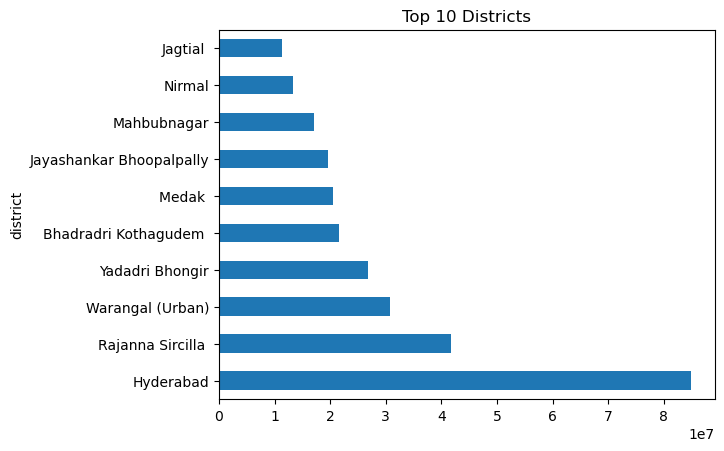

In [51]:
combine.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10).plot(kind='barh',title='Top 10 Districts')

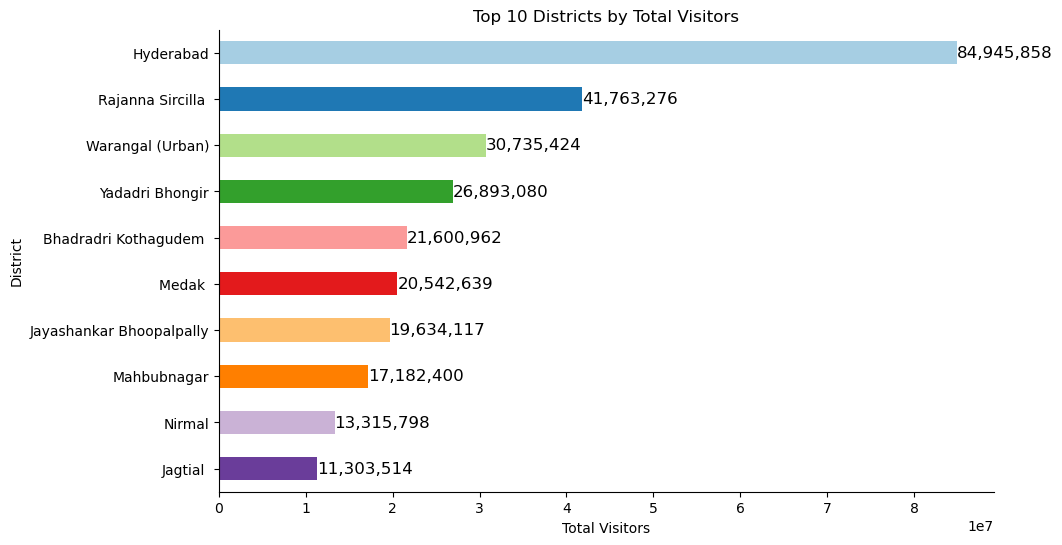

In [52]:
# Chatgpt
# Group by district and sum visitors, then sort in descending order and take the top 10
top_10_districts = combine.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(top_10_districts)))  # Use a colormap for different colors

top_10_districts.plot(kind='barh', color=colors)

# Add labels and title
plt.xlabel('Total Visitors')
plt.ylabel('District')
plt.title('Top 10 Districts by Total Visitors')

# Add data labels on the bars
for i, value in enumerate(top_10_districts):
    plt.text(value, i, f'{value:,}', va='center', fontsize=12, color='black')

# Invert the y-axis for better readability (top district at the top)
plt.gca().invert_yaxis()

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

In [53]:
combine.to_csv("combined.csv")

### Overall bottom 10 district

In [54]:
combine.groupby('district')['visitors'].sum().sort_values(ascending=True).head(10)

district
Ranga Reddy                    0
Vikarabad                      0
Suryapet                       0
Medchal                        0
Narayanpet                     5
Kamareddy                   1773
Peddapalli                 56977
Komaram Bheem Asifabad     92734
Nizamabad                 116152
Narayanapet               389250
Name: visitors, dtype: int64

<AxesSubplot:title={'center':'Bottom 10 districts'}, ylabel='district'>

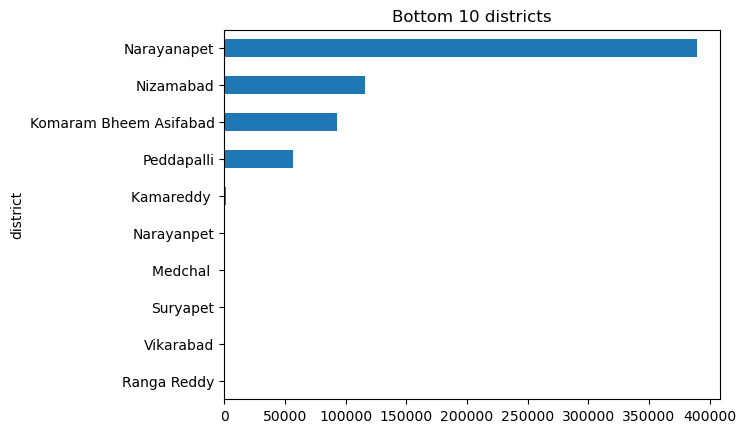

In [55]:
combine.groupby('district')['visitors'].sum().sort_values(ascending=True).head(10).plot(kind='barh',title='Bottom 10 districts')

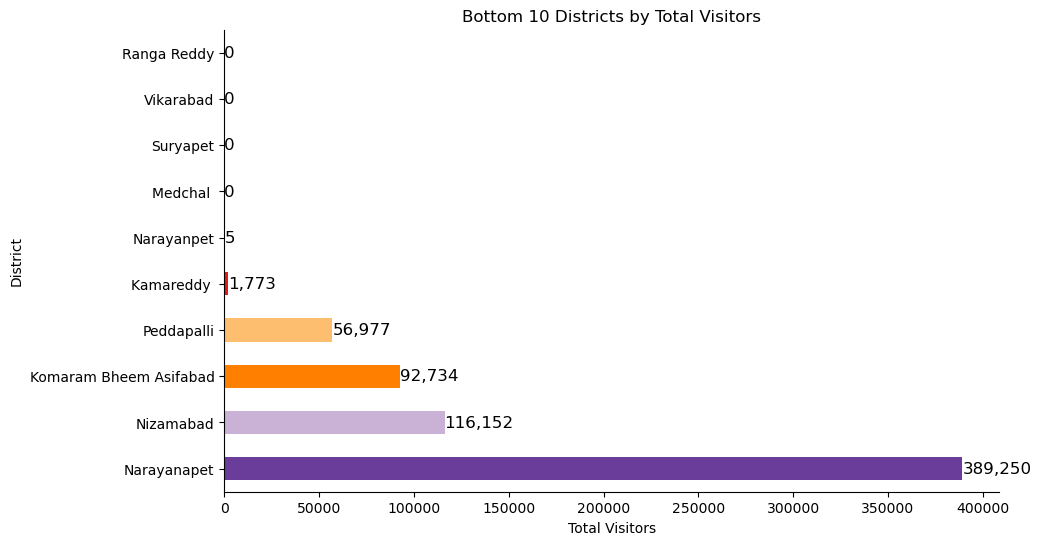

In [56]:
# Chatgpt
# Group by district and sum visitors, then sort in descending order and take the top 10
bottom_10_districts = combine.groupby('district')['visitors'].sum().sort_values(ascending=True).head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(bottom_10_districts)))  # Use a colormap for different colors

bottom_10_districts.plot(kind='barh', color=colors)

# Add labels and title
plt.xlabel('Total Visitors')
plt.ylabel('District')
plt.title('Bottom 10 Districts by Total Visitors')

# Add data labels on the bars
for i, value in enumerate(bottom_10_districts):
    plt.text(value, i, f'{value:,}', va='center', fontsize=12, color='black')

# Invert the y-axis for better readability (top district at the top)
plt.gca().invert_yaxis()

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


### Q2.List down the top 3 districts based on compounded annual growth rate (CAGR) of visitors ?

### Q3.List down the Bottom 3 districts based on compounded annual growth rate (CAGR) of visitors ?

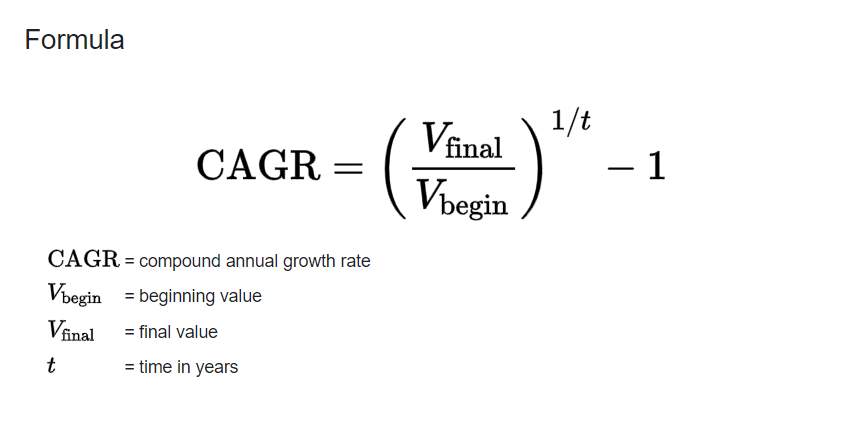

In [57]:
pd.set_option("display.max_rows", None)

In [58]:
domestic.groupby(['year','district'])['visitors'].sum()

year  district                
2016  Adilabad                     5075557
      Bhadradri Kothagudem          889030
      Hyderabad                   23394705
      Jagtial                       623077
      Jangaon                        40660
      Jayashankar Bhoopalpally      243400
      Jogulamba Gadwal              523401
      Kamareddy                        127
      Karimnagar                   9167468
      Khammam                      5005031
      Komaram Bheem Asifabad             0
      Mahabubabad                   140002
      Mahbubnagar                  8304766
      Mancherial                      7802
      Medak                        3463200
      Medchal                            0
      Nagarkurnool                  588473
      Nalgonda                     5858461
      Nirmal                        916610
      Nizamabad                       6442
      Peddapalli                      3244
      Rajanna Sircilla             2176801
      Ranga Reddy      

In [59]:
districts=domestic['district'].unique()

In [60]:
districts

array(['Adilabad', 'Bhadradri Kothagudem ', 'Hyderabad', 'Jagtial ',
       'Jangaon ', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal ',
       'Kamareddy ', 'Karimnagar ', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad ', 'Mahbubnagar', 'Mancherial', 'Medak ', 'Medchal ',
       'Nagarkurnool ', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla ', 'Ranga Reddy', 'Sangareddy ', 'Siddipet',
       'Suryapet', 'Vikarabad', 'Wanaparthy ', 'Warangal (Rural)',
       'Warangal (Urban)', 'Yadadri Bhongir', 'Mulugu', 'Narayanapet'],
      dtype=object)

In [61]:
dom=pd.DataFrame({'district':districts})

In [62]:
dom

,district
0,Adilabad
1,Bhadradri Kothagudem
2,Hyderabad
3,Jagtial
4,Jangaon
5,Jayashankar Bhoopalpally
6,Jogulamba Gadwal
7,Kamareddy
8,Karimnagar
9,Khammam


In [63]:
dom_2016=[]
for i in districts:
    domestic_2016 = domestic[domestic["year"]==2016]
    domo = domestic_2016[domestic_2016["district"]==i]['visitors'].sum()
    dom_2016.append(domo)
dom["2016"]=dom_2016

In [64]:
dom

,district,2016
0,Adilabad,5075557
1,Bhadradri Kothagudem,889030
2,Hyderabad,23394705
3,Jagtial,623077
4,Jangaon,40660
5,Jayashankar Bhoopalpally,243400
6,Jogulamba Gadwal,523401
7,Kamareddy,127
8,Karimnagar,9167468
9,Khammam,5005031


In [65]:
dom_2019=[]
for i in districts:
    domestic_2019 = domestic[domestic["year"]==2019]
    domo = domestic_2019[domestic_2019["district"]==i]['visitors'].sum()
    dom_2019.append(domo)
dom["2019"]=dom_2019

In [66]:
dom

,district,2016,2019
0,Adilabad,5075557,775895
1,Bhadradri Kothagudem,889030,12817737
2,Hyderabad,23394705,13802362
3,Jagtial,623077,3086115
4,Jangaon,40660,328890
5,Jayashankar Bhoopalpally,243400,662530
6,Jogulamba Gadwal,523401,2007995
7,Kamareddy,127,534
8,Karimnagar,9167468,77491
9,Khammam,5005031,1413440


In [67]:
CAGR=[]
for i in range(len(districts)):
    vfinal = dom.loc[i,"2019"]
    vbegin = dom.loc[i,"2016"]
    cagr = (((vfinal/vbegin)**(1/3))-1)
    CAGR.append(cagr)

C:\Users\vishw\AppData\Local\Temp\ipykernel_11340\2400274060.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  cagr = (((vfinal/vbegin)**(1/3))-1)
C:\Users\vishw\AppData\Local\Temp\ipykernel_11340\2400274060.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  cagr = (((vfinal/vbegin)**(1/3))-1)


In [68]:
dom["CAGR"]=CAGR

In [69]:
dom = dom.replace([np.inf,np.nan],0)

In [70]:
dom

,district,2016,2019,CAGR
0,Adilabad,5075557,775895,-0.465305
1,Bhadradri Kothagudem,889030,12817737,1.433875
2,Hyderabad,23394705,13802362,-0.161290
3,Jagtial,623077,3086115,0.704604
4,Jangaon,40660,328890,1.007372
5,Jayashankar Bhoopalpally,243400,662530,0.396245
6,Jogulamba Gadwal,523401,2007995,0.565463
7,Kamareddy,127,534,0.614033
8,Karimnagar,9167468,77491,-0.796296
9,Khammam,5005031,1413440,-0.343920


### Domestic Top 3 CAGR Districts

In [71]:
dom_max = dom.sort_values(by="CAGR", ascending=False).head(3)
dom_max

,district,2016,2019,CAGR
13,Mancherial,7802,269810,2.257997
28,Warangal (Rural),19400,353500,1.631455
1,Bhadradri Kothagudem,889030,12817737,1.433875


In [72]:
dom_max = dom_max.reset_index()
dom_max

,index,district,2016,2019,CAGR
0,13,Mancherial,7802,269810,2.257997
1,28,Warangal (Rural),19400,353500,1.631455
2,1,Bhadradri Kothagudem,889030,12817737,1.433875


In [73]:
dom_max.drop("index", axis=1,inplace=True)
dom_max

,district,2016,2019,CAGR
0,Mancherial,7802,269810,2.257997
1,Warangal (Rural),19400,353500,1.631455
2,Bhadradri Kothagudem,889030,12817737,1.433875


<AxesSubplot:xlabel='district'>

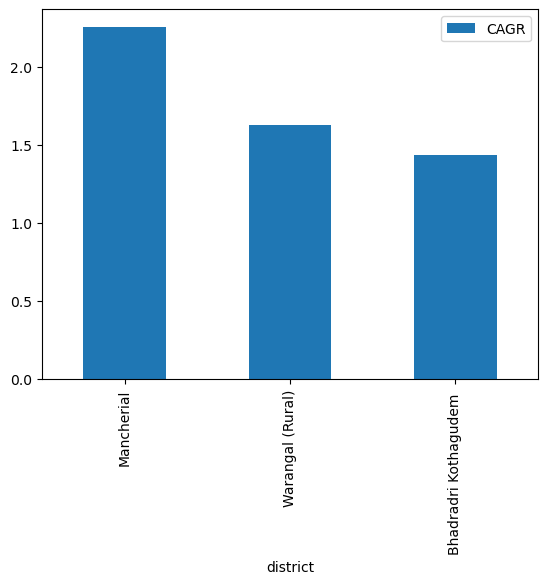

In [74]:
dom_max.plot("district", "CAGR", kind="bar")

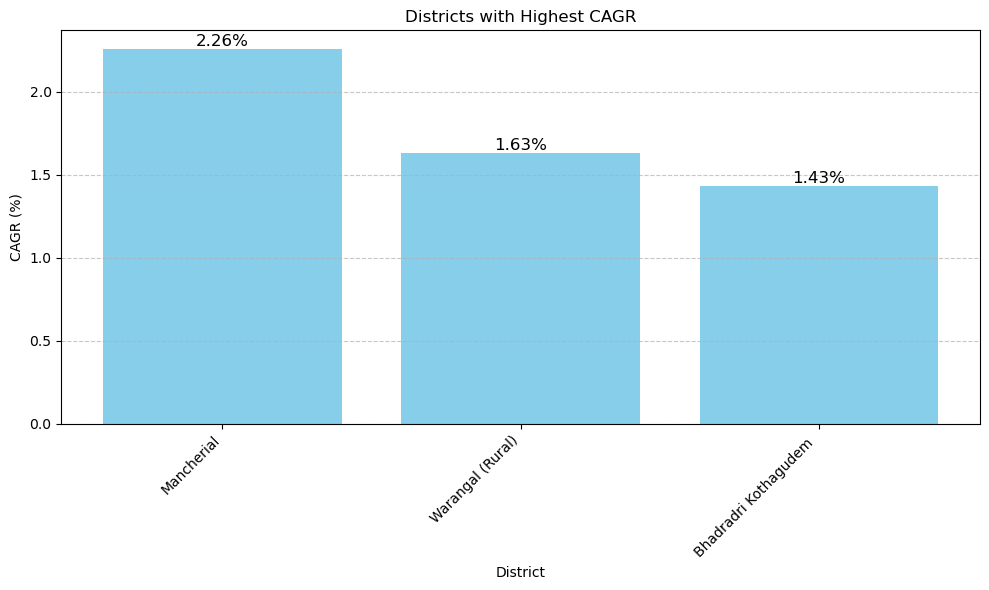

In [75]:
# Sort the DataFrame by CAGR in descending order
dom_max_sorted = dom_max.sort_values(by="CAGR", ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot
bars = ax.bar(dom_max_sorted["district"], dom_max_sorted["CAGR"], color='skyblue')

# Add data labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
ax.set_xlabel('District')
ax.set_ylabel('CAGR (%)')
ax.set_title('Districts with Highest CAGR')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


### Domestic Bottom 3 CAGR Districts

In [76]:
dom_min = dom.sort_values(by="CAGR", ascending=True).head(3)
dom_min = dom_min.reset_index()
dom_min.drop("index", axis=1,inplace=True)
dom_min

,district,2016,2019,CAGR
0,Karimnagar,9167468,77491,-0.796296
1,Nalgonda,5858461,140918,-0.711335
2,Warangal (Urban),25788035,1795230,-0.588629


<AxesSubplot:xlabel='district'>

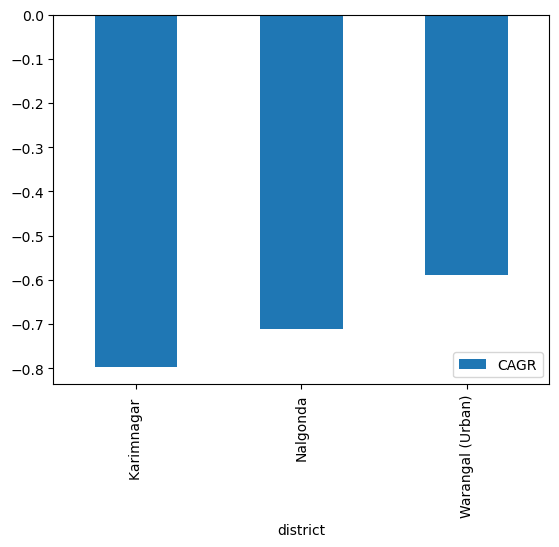

In [77]:
dom_min.plot("district", "CAGR", kind="bar")

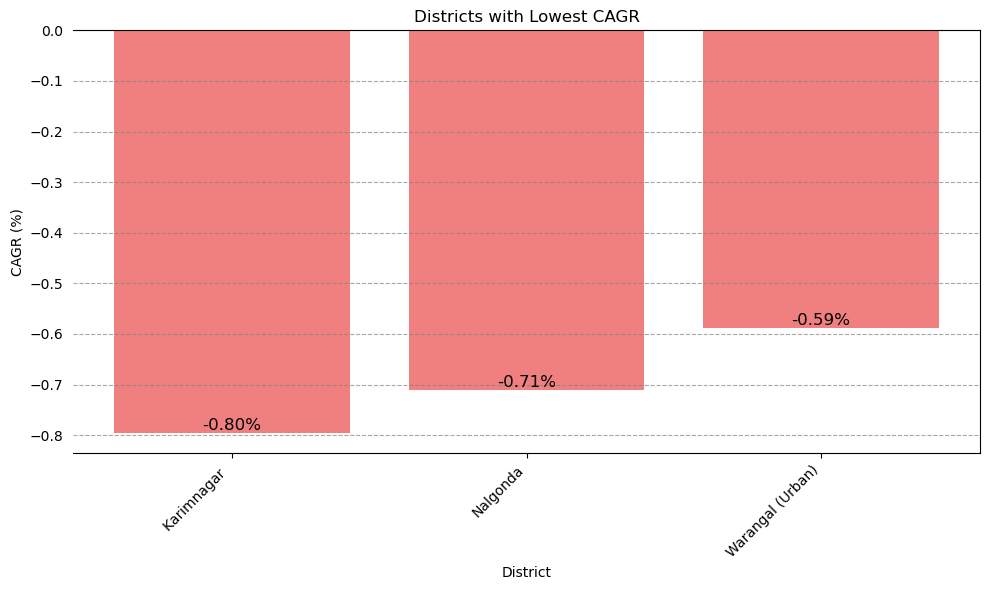

In [78]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called dom_min with "district" and "CAGR" columns

# Sort the DataFrame by CAGR in ascending order
dom_min_sorted = dom_min.sort_values(by="CAGR")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot
bars = ax.bar(dom_min_sorted["district"], dom_min_sorted["CAGR"], color='lightcoral')

# Add data labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
ax.set_xlabel('District')
ax.set_ylabel('CAGR (%)')
ax.set_title('Districts with Lowest CAGR')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove y-axis ticks and spines
ax.yaxis.set_ticks_position('none')
ax.spines['left'].set_visible(False)

# Add grid lines behind the bars for a clean look
ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray', zorder=0)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [79]:
dom.to_csv("Domestic_CAGR.csv")

### Foreign Top 3 CAGR Districts

In [80]:
foreign.groupby(["year","district"])["visitors"].sum()

year  district                
2016  Adilabad                        10
      Bhadradri Kothagudem             0
      Hyderabad                   163631
      Jagtial                          0
      Jangaon                          2
      Jayashankar Bhoopalpally        86
      Jogulamba Gadwal                45
      Kamareddy                        0
      Karimnagar                       0
      Khammam                          0
      Komaram Bheem Asifabad           0
      Mahabubabad                      0
      Mahbubnagar                    868
      Mancherial                       0
      Medak                            0
      Medchal                          0
      Nagarkurnool                    29
      Nalgonda                         0
      Nirmal                           0
      Nizamabad                        0
      Peddapalli                       0
      Rajanna Sircilla                 0
      Ranga Reddy                      0
      Sangareddy          

In [81]:
fore = pd.DataFrame({"district":districts})

In [82]:
fore_2016=[]
for i in districts:
    foreign_2016 = foreign[foreign["year"]==2016]
    foreg = foreign_2016[foreign_2016["district"]==i].visitors.sum()
    fore_2016.append(foreg)
fore["2016"]=fore_2016

In [83]:
fore_2019=[]
for i in districts:
    foreign_2019 = foreign[foreign["year"]==2019]
    foreg = foreign_2019[foreign_2019["district"]==i].visitors.sum()
    fore_2019.append(foreg)
fore["2019"]=fore_2019

In [84]:
fore

,district,2016,2019
0,Adilabad,10,6
1,Bhadradri Kothagudem,0,0
2,Hyderabad,163631,319300
3,Jagtial,0,0
4,Jangaon,2,0
5,Jayashankar Bhoopalpally,86,45
6,Jogulamba Gadwal,45,295
7,Kamareddy,0,0
8,Karimnagar,0,0
9,Khammam,0,0


In [85]:
CAGR=[]
for i in range(len(districts)):
    vfinal = fore.loc[i,"2019"]
    vbegin = fore.loc[i,"2016"]
    cagr = (((vfinal/vbegin)**(1/3))-1)
    CAGR.append(cagr)

C:\Users\vishw\AppData\Local\Temp\ipykernel_11340\3495905648.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  cagr = (((vfinal/vbegin)**(1/3))-1)
C:\Users\vishw\AppData\Local\Temp\ipykernel_11340\3495905648.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  cagr = (((vfinal/vbegin)**(1/3))-1)


In [86]:
fore["CAGR"]=CAGR

In [87]:
fore

,district,2016,2019,CAGR
0,Adilabad,10,6,-0.156567
1,Bhadradri Kothagudem,0,0,NaN
2,Hyderabad,163631,319300,0.249619
3,Jagtial,0,0,NaN
4,Jangaon,2,0,-1.000000
5,Jayashankar Bhoopalpally,86,45,-0.194180
6,Jogulamba Gadwal,45,295,0.871557
7,Kamareddy,0,0,NaN
8,Karimnagar,0,0,NaN
9,Khammam,0,0,NaN


In [88]:
fore = fore.replace([np.inf,np.nan],0)

In [89]:
fore

,district,2016,2019,CAGR
0,Adilabad,10,6,-0.156567
1,Bhadradri Kothagudem,0,0,0.000000
2,Hyderabad,163631,319300,0.249619
3,Jagtial,0,0,0.000000
4,Jangaon,2,0,-1.000000
5,Jayashankar Bhoopalpally,86,45,-0.194180
6,Jogulamba Gadwal,45,295,0.871557
7,Kamareddy,0,0,0.000000
8,Karimnagar,0,0,0.000000
9,Khammam,0,0,0.000000


In [90]:
fore.sort_values(by="CAGR", ascending=False)

,district,2016,2019,CAGR
16,Nagarkurnool,29,199,0.900283
6,Jogulamba Gadwal,45,295,0.871557
2,Hyderabad,163631,319300,0.249619
29,Warangal (Urban),1899,2450,0.088630
25,Suryapet,0,0,0.000000
20,Peddapalli,0,0,0.000000
21,Rajanna Sircilla,0,0,0.000000
22,Ranga Reddy,0,0,0.000000
23,Sangareddy,0,0,0.000000
24,Siddipet,0,0,0.000000


In [91]:
fore_max = fore.sort_values(by="CAGR", ascending=False).head(3)
fore_max = fore_max.reset_index()
fore_max.drop("index", axis=1, inplace=True)

In [92]:
fore_max

,district,2016,2019,CAGR
0,Nagarkurnool,29,199,0.900283
1,Jogulamba Gadwal,45,295,0.871557
2,Hyderabad,163631,319300,0.249619


<AxesSubplot:xlabel='district'>

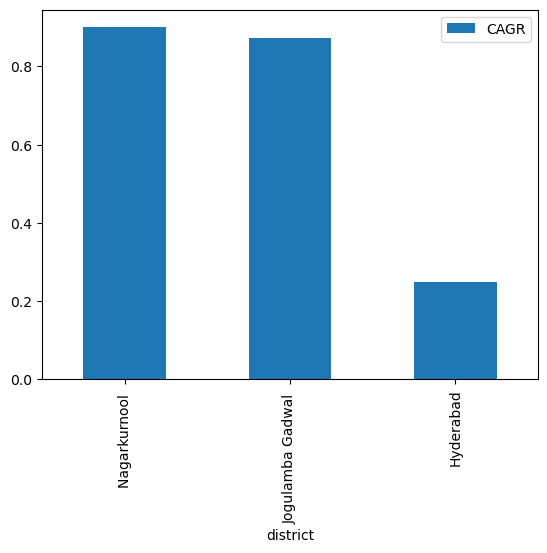

In [93]:
fore_max.head().plot("district", "CAGR", kind="bar")

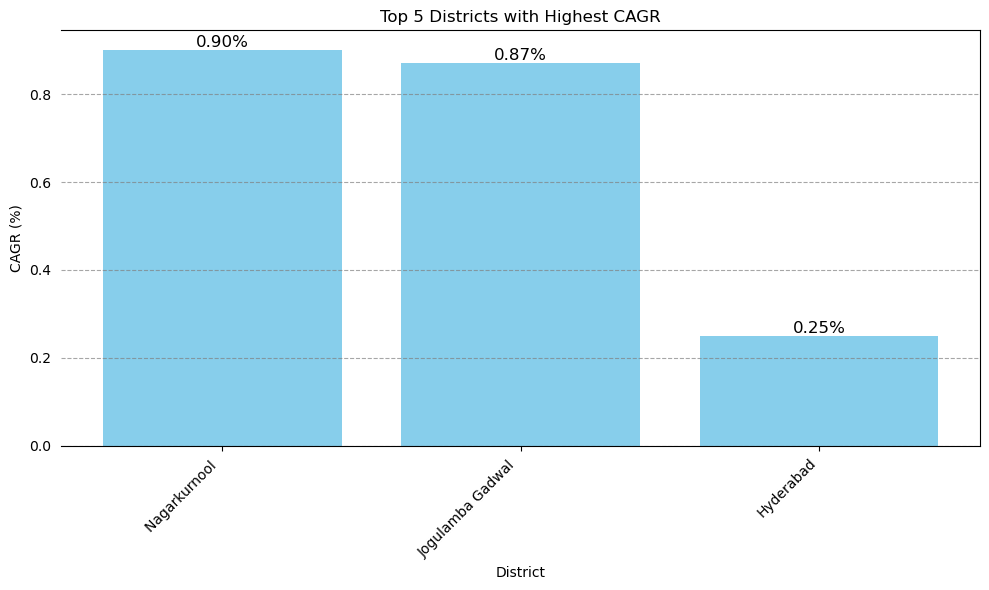

In [94]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called fore_max with "district" and "CAGR" columns

# Sort the DataFrame by CAGR in descending order
fore_max_sorted = fore_max.head().sort_values(by="CAGR", ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot
bars = ax.bar(fore_max_sorted["district"], fore_max_sorted["CAGR"], color='skyblue')

# Add data labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
ax.set_xlabel('District')
ax.set_ylabel('CAGR (%)')
ax.set_title('Top 5 Districts with Highest CAGR')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove y-axis ticks and spines
ax.yaxis.set_ticks_position('none')
ax.spines['left'].set_visible(False)

# Add grid lines behind the bars for a clean look
ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray', zorder=0)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


### Foreign Bottom 3 CAGR Districts

In [95]:
fore_min = fore.sort_values(by="CAGR", ascending=True).head(3)
fore_min = fore_min.reset_index()
fore_min.drop("index", axis=1, inplace=True)

In [96]:
fore_min

,district,2016,2019,CAGR
0,Jangaon,2,0,-1.000000
1,Mahbubnagar,868,440,-0.202659
2,Jayashankar Bhoopalpally,86,45,-0.194180


<AxesSubplot:xlabel='district'>

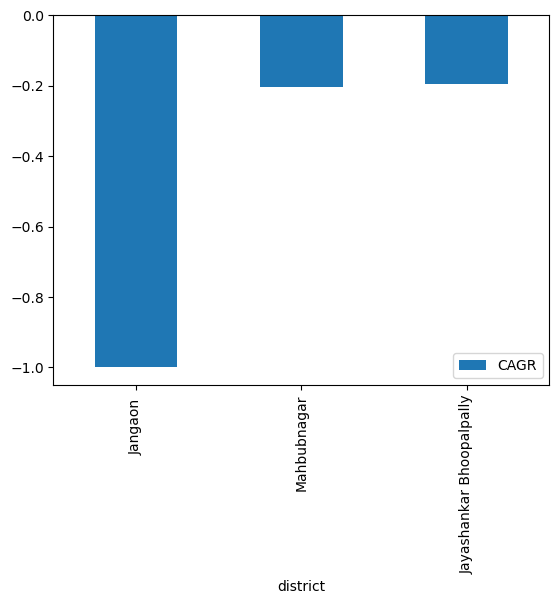

In [97]:
fore_min.head().plot("district", "CAGR", kind="bar")

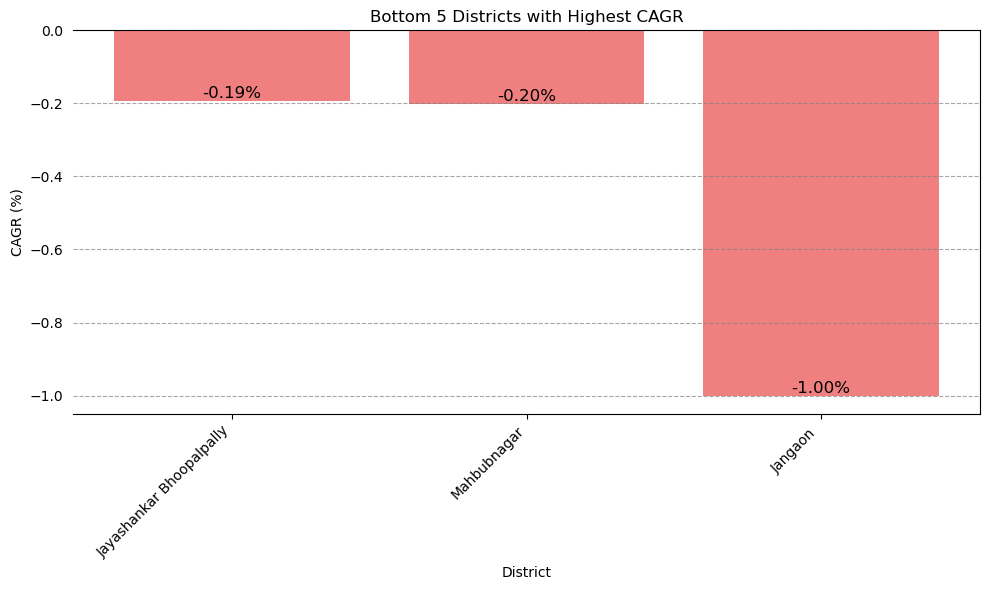

In [98]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called fore_min with "district" and "CAGR" columns

# Sort the DataFrame by CAGR in descending order
fore_min_sorted = fore_min.head().sort_values(by="CAGR", ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot
bars = ax.bar(fore_min_sorted["district"], fore_min_sorted["CAGR"], color='lightcoral')

# Add data labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
ax.set_xlabel('District')
ax.set_ylabel('CAGR (%)')
ax.set_title('Bottom 5 Districts with Highest CAGR')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove y-axis ticks and spines
ax.yaxis.set_ticks_position('none')
ax.spines['left'].set_visible(False)

# Add grid lines behind the bars for a clean look
ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray', zorder=0)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [99]:
fore.to_csv("Foreign_CAGR.csv")

### Q4.What are the peak and low season months for Hyderabad based on the data from 2016 to 2019 for Hyderabad district?

In [100]:
hyderabad=domestic[domestic['district']=='Hyderabad']

In [101]:
hyderabad.groupby('month')['visitors'].sum().sort_values(ascending=False).head()

month
June        16897783
December     9338637
October      6552397
January      6452101
April        6126839
Name: visitors, dtype: int64

<AxesSubplot:title={'center':'Peak season months'}, xlabel='month'>

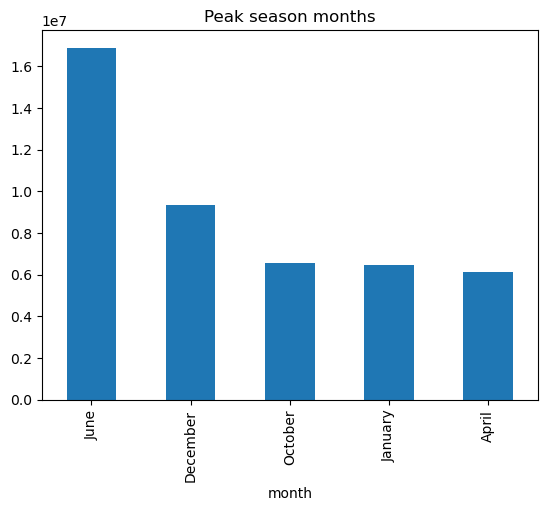

In [102]:
hyderabad.groupby('month')['visitors'].sum().sort_values(ascending=False).head().plot(kind='bar',title='Peak season months')

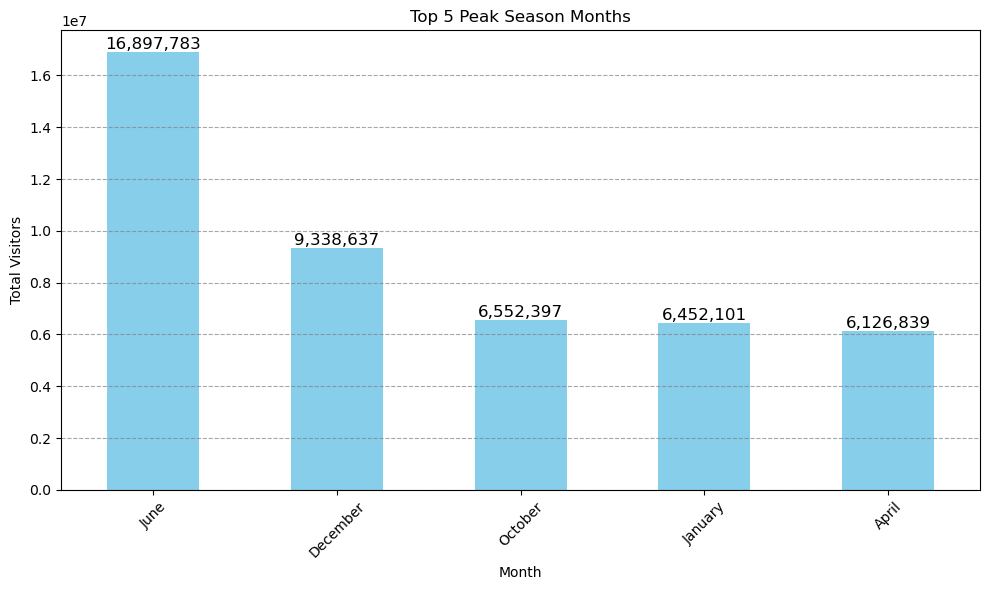

In [103]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called hyderabad with "month" and "visitors" columns

# Group by month, sum visitors, then sort in descending order and take the top 5
peak_season_months = hyderabad.groupby('month')['visitors'].sum().sort_values(ascending=False).head()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot
bars = peak_season_months.plot(kind='bar', color='skyblue')

# Add data labels on the bars
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(f'{height:,}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Total Visitors')
ax.set_title('Top 5 Peak Season Months')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [104]:
hyderabad.groupby('month')['visitors'].sum().sort_values(ascending=False).tail()

month
November     5626156
July         5552527
September    5312283
March        5227626
February     5014430
Name: visitors, dtype: int64

<AxesSubplot:title={'center':'low season months'}, xlabel='month'>

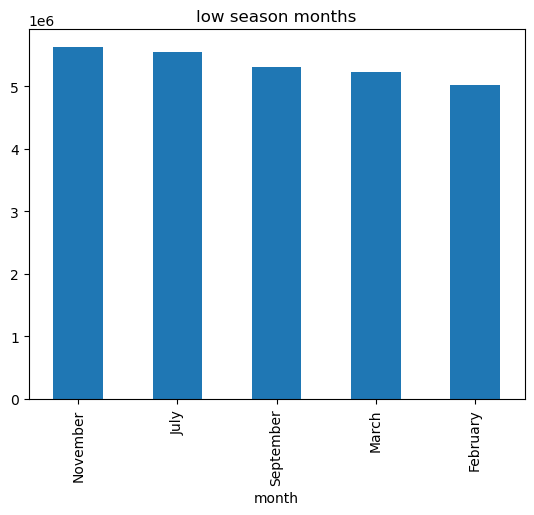

In [105]:
hyderabad.groupby('month')['visitors'].sum().sort_values(ascending=False).tail().plot(kind='bar',title='low season months')

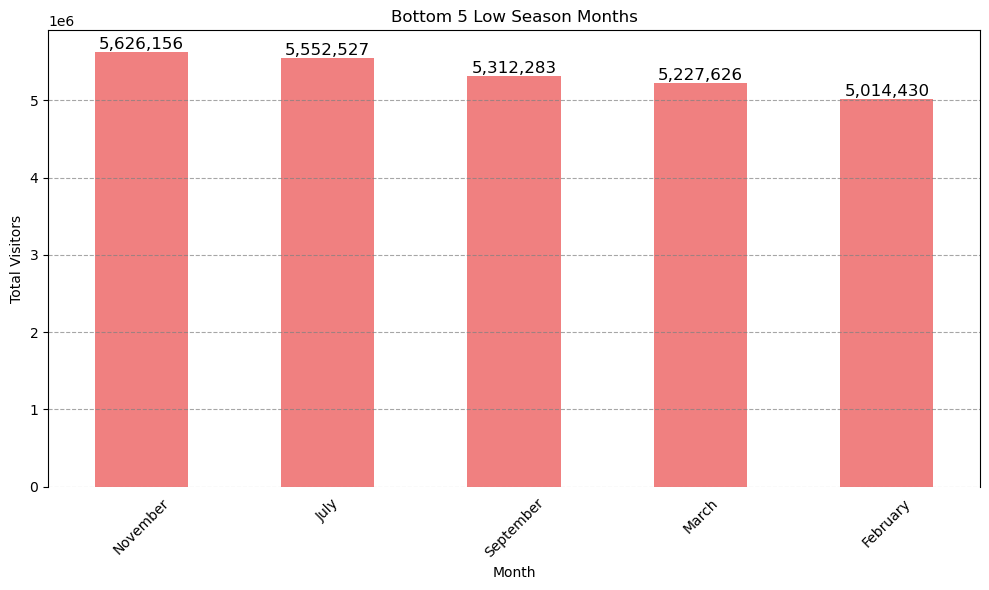

In [106]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called hyderabad with "month" and "visitors" columns

# Group by month, sum visitors, then sort in descending order and take the bottom 5
low_season_months = hyderabad.groupby('month')['visitors'].sum().sort_values(ascending=False).tail()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot
bars = low_season_months.plot(kind='bar', color='lightcoral')

# Add data labels on the bars
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(f'{height:,}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Total Visitors')
ax.set_title('Bottom 5 Low Season Months')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove x-axis ticks and spines
ax.xaxis.set_ticks_position('none')
ax.spines['bottom'].set_visible(False)

# Add grid lines behind the bars for a clean look
ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray', zorder=0)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


### Q5.Show the top & bottom 3 districts with high domestic to foreign tourist ratio?

In [107]:
df

,foreign,domestic
district,,
Adilabad,32,7321575
Bhadradri Kothagudem,0,21600962
Hyderabad,1044898,83900960
Jagtial,0,11303514
Jangaon,2,826280
Jayashankar Bhoopalpally,1252,19632865
Jogulamba Gadwal,945,6813340
Kamareddy,0,1773
Karimnagar,0,9462383


In [108]:
ratios = []
for i in range(33):
    ratio = df.iloc[i,1]/df.iloc[i,0]
    ratios.append(ratio)
df["Ratio"]=ratios

C:\Users\vishw\AppData\Local\Temp\ipykernel_11340\1637206168.py:3: RuntimeWarning: divide by zero encountered in longlong_scalars
  ratio = df.iloc[i,1]/df.iloc[i,0]
C:\Users\vishw\AppData\Local\Temp\ipykernel_11340\1637206168.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  ratio = df.iloc[i,1]/df.iloc[i,0]


In [109]:
df

,foreign,domestic,Ratio
district,,,
Adilabad,32,7321575,2.287992e+05
Bhadradri Kothagudem,0,21600962,inf
Hyderabad,1044898,83900960,8.029584e+01
Jagtial,0,11303514,inf
Jangaon,2,826280,4.131400e+05
Jayashankar Bhoopalpally,1252,19632865,1.568120e+04
Jogulamba Gadwal,945,6813340,7.209884e+03
Kamareddy,0,1773,inf
Karimnagar,0,9462383,inf


In [110]:
df.replace([np.nan,np.inf],0)

,foreign,domestic,Ratio
district,,,
Adilabad,32,7321575,2.287992e+05
Bhadradri Kothagudem,0,21600962,0.000000e+00
Hyderabad,1044898,83900960,8.029584e+01
Jagtial,0,11303514,0.000000e+00
Jangaon,2,826280,4.131400e+05
Jayashankar Bhoopalpally,1252,19632865,1.568120e+04
Jogulamba Gadwal,945,6813340,7.209884e+03
Kamareddy,0,1773,0.000000e+00
Karimnagar,0,9462383,0.000000e+00


In [111]:
df_ratio = df.sort_values(by="Ratio", ascending=False).where(df["foreign"]>100)

In [112]:
df_ratio

,foreign,domestic,Ratio
district,,,
Medak,NaN,NaN,NaN
Komaram Bheem Asifabad,NaN,NaN,NaN
Wanaparthy,NaN,NaN,NaN
Siddipet,NaN,NaN,NaN
Sangareddy,NaN,NaN,NaN
Rajanna Sircilla,NaN,NaN,NaN
Peddapalli,NaN,NaN,NaN
Nalgonda,NaN,NaN,NaN
Bhadradri Kothagudem,NaN,NaN,NaN


In [113]:
df_ratio = df_ratio.dropna()

In [114]:
df_ratio.sort_values(by="Ratio", ascending=True, inplace=True)

C:\Users\vishw\AppData\Local\Temp\ipykernel_11340\3006729634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratio.sort_values(by="Ratio", ascending=True, inplace=True)


In [115]:
df_ratio = df_ratio.reset_index()

In [116]:
df_ratio.head()

,district,foreign,domestic,Ratio
0,Hyderabad,1044898.0,83900960.0,80.295837
1,Warangal (Rural),306.0,819162.0,2677.000000
2,Mulugu,575.0,1819800.0,3164.869565
3,Warangal (Urban),8821.0,30726603.0,3483.346899
4,Jogulamba Gadwal,945.0,6813340.0,7209.883598


<AxesSubplot:xlabel='district'>

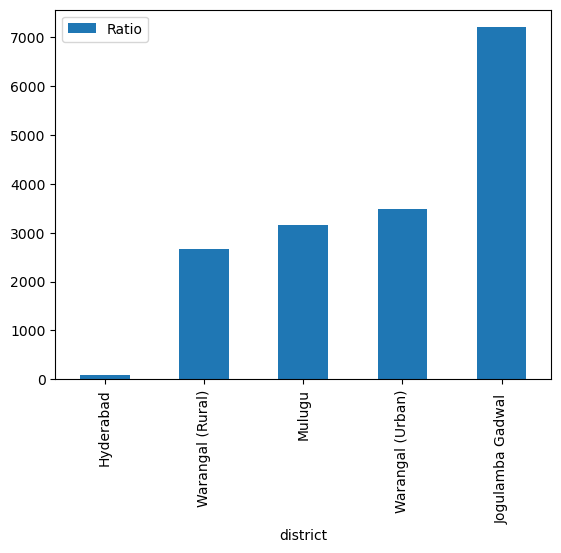

In [117]:
df_ratio.head().plot("district", "Ratio", kind="bar")

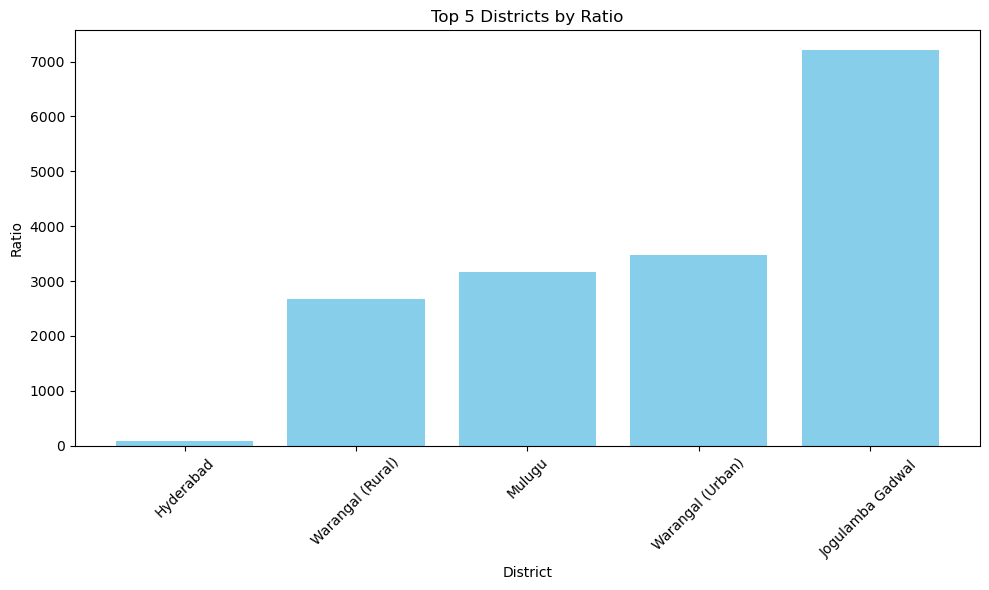

In [118]:
import matplotlib.pyplot as plt



# Select the top 5 rows for plotting
top5_districts = df_ratio.head()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(top5_districts["district"], top5_districts["Ratio"], color='skyblue')

# Adding labels and titles
plt.xlabel("District")
plt.ylabel("Ratio")
plt.title("Top 5 Districts by Ratio")

# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()


In [119]:
df_ratio.tail().sort_values(by="Ratio", ascending=False, inplace=True)

C:\Users\vishw\AppData\Local\Temp\ipykernel_11340\2971362504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratio.tail().sort_values(by="Ratio", ascending=False, inplace=True)


In [120]:
df_ratio.tail()

,district,foreign,domestic,Ratio
3,Warangal (Urban),8821.0,30726603.0,3483.346899
4,Jogulamba Gadwal,945.0,6813340.0,7209.883598
5,Mahbubnagar,2282.0,17180118.0,7528.535495
6,Nagarkurnool,761.0,7424355.0,9756.051248
7,Jayashankar Bhoopalpally,1252.0,19632865.0,15681.202077


<AxesSubplot:xlabel='district'>

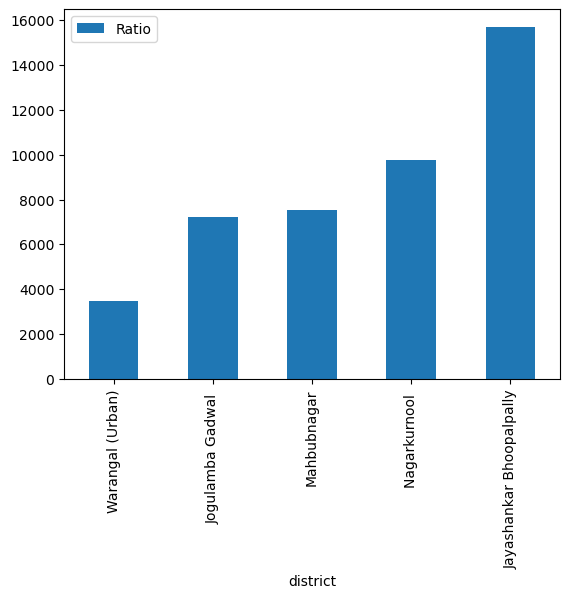

In [121]:
df_ratio.tail().plot("district", "Ratio", kind="bar")

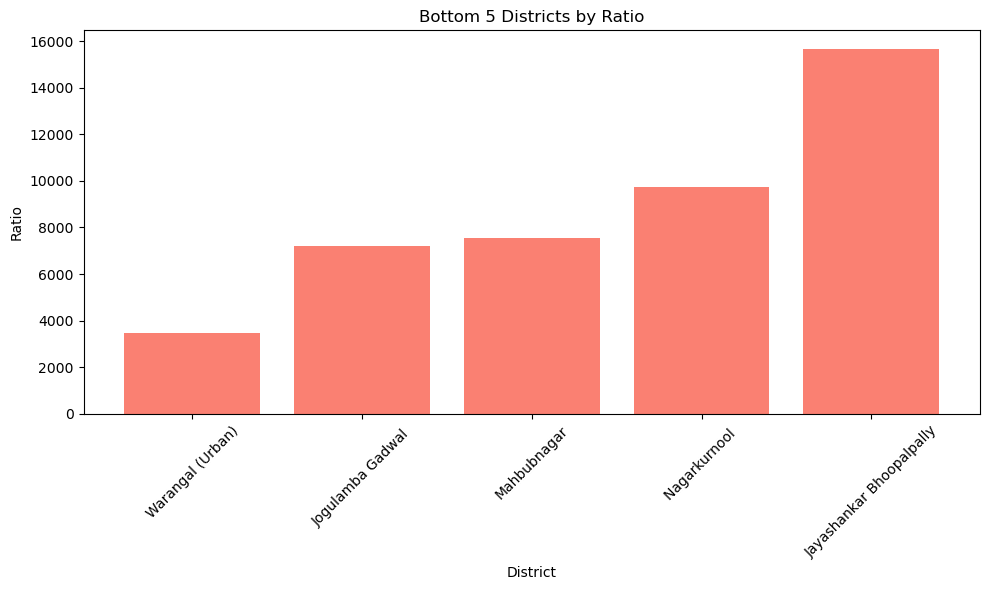

In [122]:
import matplotlib.pyplot as plt



# Select the bottom 5 rows for plotting
tail5_districts = df_ratio.tail()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(tail5_districts["district"], tail5_districts["Ratio"], color='salmon')

# Adding labels and titles
plt.xlabel("District")
plt.ylabel("Ratio")
plt.title("Bottom 5 Districts by Ratio")

# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()


In [123]:
df_ratio.to_csv("df_ratio.csv")

In [124]:
df_ratio.shape

(8, 4)

### Q6.List the top & bottom 5 districts based on 'population to tourist footfall ratio' ratio in 2019?

In [125]:
# import data from 'https://www.indiacensus.net/states/telangana' site using excel(get data-> from web) 

In [126]:
pop=pd.read_csv('tel_district_pop.csv')

In [127]:
pop

,S.No.,District Name,As per 2011 census,Estimated Population in 2023,2019
0,1,Adilabad,708972,768667,748769
1,2,Bhadradri Kothagudem,1069261,1159293,1129283
2,3,Hyderabad,3943323,4275351,4164675
3,4,Jagitial,985417,1068389,1040732
4,5,Jangaon,566376,614065,598169
5,6,Jayashankar Bhupalpally,416763,451854,440157
6,7,Jogulamba Gadwal,609990,661351,644231
7,8,Kamareddy,972625,1054520,1027222
8,9,Karimnagar,1005711,1090392,1062165
9,10,Khammam,1401639,1519657,1480318


In [128]:
pop.drop("S.No.", axis=1, inplace=True)

In [129]:
pop

,District Name,As per 2011 census,Estimated Population in 2023,2019
0,Adilabad,708972,768667,748769
1,Bhadradri Kothagudem,1069261,1159293,1129283
2,Hyderabad,3943323,4275351,4164675
3,Jagitial,985417,1068389,1040732
4,Jangaon,566376,614065,598169
5,Jayashankar Bhupalpally,416763,451854,440157
6,Jogulamba Gadwal,609990,661351,644231
7,Kamareddy,972625,1054520,1027222
8,Karimnagar,1005711,1090392,1062165
9,Khammam,1401639,1519657,1480318


In [130]:
pop.sort_values(by="District Name", inplace=True)

In [131]:
pop

,District Name,As per 2011 census,Estimated Population in 2023,2019
0,Adilabad,708972,768667,748769
1,Bhadradri Kothagudem,1069261,1159293,1129283
2,Hyderabad,3943323,4275351,4164675
3,Jagitial,985417,1068389,1040732
4,Jangaon,566376,614065,598169
5,Jayashankar Bhupalpally,416763,451854,440157
6,Jogulamba Gadwal,609990,661351,644231
7,Kamareddy,972625,1054520,1027222
8,Karimnagar,1005711,1090392,1062165
9,Khammam,1401639,1519657,1480318


In [132]:
dom

,district,2016,2019,CAGR
0,Adilabad,5075557,775895,-0.465305
1,Bhadradri Kothagudem,889030,12817737,1.433875
2,Hyderabad,23394705,13802362,-0.161290
3,Jagtial,623077,3086115,0.704604
4,Jangaon,40660,328890,1.007372
5,Jayashankar Bhoopalpally,243400,662530,0.396245
6,Jogulamba Gadwal,523401,2007995,0.565463
7,Kamareddy,127,534,0.614033
8,Karimnagar,9167468,77491,-0.796296
9,Khammam,5005031,1413440,-0.343920


In [133]:
dom = dom.sort_values(by="district")

In [134]:
dom

,district,2016,2019,CAGR
0,Adilabad,5075557,775895,-0.465305
1,Bhadradri Kothagudem,889030,12817737,1.433875
2,Hyderabad,23394705,13802362,-0.161290
3,Jagtial,623077,3086115,0.704604
4,Jangaon,40660,328890,1.007372
5,Jayashankar Bhoopalpally,243400,662530,0.396245
6,Jogulamba Gadwal,523401,2007995,0.565463
7,Kamareddy,127,534,0.614033
8,Karimnagar,9167468,77491,-0.796296
9,Khammam,5005031,1413440,-0.343920


In [135]:
dom.reset_index(inplace=True)
dom.drop("index", axis=1, inplace=True)

In [136]:
pop["dom_visitors"] = dom["2019"]

In [137]:
pop

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors
0,Adilabad,708972,768667,748769,775895
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737
2,Hyderabad,3943323,4275351,4164675,13802362
3,Jagitial,985417,1068389,1040732,3086115
4,Jangaon,566376,614065,598169,328890
5,Jayashankar Bhupalpally,416763,451854,440157,662530
6,Jogulamba Gadwal,609990,661351,644231,2007995
7,Kamareddy,972625,1054520,1027222,534
8,Karimnagar,1005711,1090392,1062165,77491
9,Khammam,1401639,1519657,1480318,1413440


In [138]:
foreign_v = pd.DataFrame({"district":districts})

In [139]:
foreign.groupby(["year","district"])["visitors"].sum()

year  district                
2016  Adilabad                        10
      Bhadradri Kothagudem             0
      Hyderabad                   163631
      Jagtial                          0
      Jangaon                          2
      Jayashankar Bhoopalpally        86
      Jogulamba Gadwal                45
      Kamareddy                        0
      Karimnagar                       0
      Khammam                          0
      Komaram Bheem Asifabad           0
      Mahabubabad                      0
      Mahbubnagar                    868
      Mancherial                       0
      Medak                            0
      Medchal                          0
      Nagarkurnool                    29
      Nalgonda                         0
      Nirmal                           0
      Nizamabad                        0
      Peddapalli                       0
      Rajanna Sircilla                 0
      Ranga Reddy                      0
      Sangareddy          

In [140]:
for_2019=[]
for i in districts:
    foreign_2019 = foreign[foreign["year"]==2019]
    fore = foreign_2019[foreign_2019["district"]==i].visitors.sum()
    for_2019.append(fore)
foreign_v["2019"]=for_2019

In [141]:
foreign_v

,district,2019
0,Adilabad,6
1,Bhadradri Kothagudem,0
2,Hyderabad,319300
3,Jagtial,0
4,Jangaon,0
5,Jayashankar Bhoopalpally,45
6,Jogulamba Gadwal,295
7,Kamareddy,0
8,Karimnagar,0
9,Khammam,0


In [142]:
foreign_v = foreign_v.sort_values(by="district")

In [143]:
foreign_v = foreign_v.reset_index()
foreign_v.drop("index", axis=1, inplace=True)

In [144]:
pop["for_visitors"] = foreign_v["2019"]

In [145]:
pop

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors
0,Adilabad,708972,768667,748769,775895,6
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737,0
2,Hyderabad,3943323,4275351,4164675,13802362,319300
3,Jagitial,985417,1068389,1040732,3086115,0
4,Jangaon,566376,614065,598169,328890,0
5,Jayashankar Bhupalpally,416763,451854,440157,662530,45
6,Jogulamba Gadwal,609990,661351,644231,2007995,295
7,Kamareddy,972625,1054520,1027222,534,0
8,Karimnagar,1005711,1090392,1062165,77491,0
9,Khammam,1401639,1519657,1480318,1413440,0


In [146]:
total=[]
for i in range(len(pop)):
    sum = pop.iloc[i,4] + pop.iloc[i,5]
    total.append(sum)

In [147]:
pop["Total_Visitors"] = total

In [148]:
pop

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors,Total_Visitors
0,Adilabad,708972,768667,748769,775895,6,775901
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737,0,12817737
2,Hyderabad,3943323,4275351,4164675,13802362,319300,14121662
3,Jagitial,985417,1068389,1040732,3086115,0,3086115
4,Jangaon,566376,614065,598169,328890,0,328890
5,Jayashankar Bhupalpally,416763,451854,440157,662530,45,662575
6,Jogulamba Gadwal,609990,661351,644231,2007995,295,2008290
7,Kamareddy,972625,1054520,1027222,534,0,534
8,Karimnagar,1005711,1090392,1062165,77491,0,77491
9,Khammam,1401639,1519657,1480318,1413440,0,1413440


In [149]:
pt_footfall_ratio = []
for i in range(len(df)):
    r = pop.iloc[i,6]/pop.iloc[i,3]
    pt_footfall_ratio.append(r)

In [150]:
pop["pt_ratio"] = pt_footfall_ratio

In [151]:
pop["pt_ratio"] = pop["pt_ratio"].round(decimals=2)

In [152]:
pop

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors,Total_Visitors,pt_ratio
0,Adilabad,708972,768667,748769,775895,6,775901,1.04
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737,0,12817737,11.35
2,Hyderabad,3943323,4275351,4164675,13802362,319300,14121662,3.39
3,Jagitial,985417,1068389,1040732,3086115,0,3086115,2.97
4,Jangaon,566376,614065,598169,328890,0,328890,0.55
5,Jayashankar Bhupalpally,416763,451854,440157,662530,45,662575,1.51
6,Jogulamba Gadwal,609990,661351,644231,2007995,295,2008290,3.12
7,Kamareddy,972625,1054520,1027222,534,0,534,0.00
8,Karimnagar,1005711,1090392,1062165,77491,0,77491,0.07
9,Khammam,1401639,1519657,1480318,1413440,0,1413440,0.95


In [153]:
pop.to_csv("population tourist footfall ratio (2019)")

In [154]:
pop.sort_values(by="pt_ratio", ascending=False, inplace=True)

In [155]:
pop.head()

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors,Total_Visitors,pt_ratio
23,Rajanna Sircilla,552037,598519,583025,16832897,0,16832897,28.87
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737,0,12817737,11.35
14,Medak,767428,832045,810506,5452570,0,5452570,6.73
16,Mulugu,257744,279446,272212,1819800,575,1820375,6.69
32,Yadadri Bhuvanagiri,739448,801710,780956,4489374,0,4489374,5.75


<AxesSubplot:xlabel='District Name'>

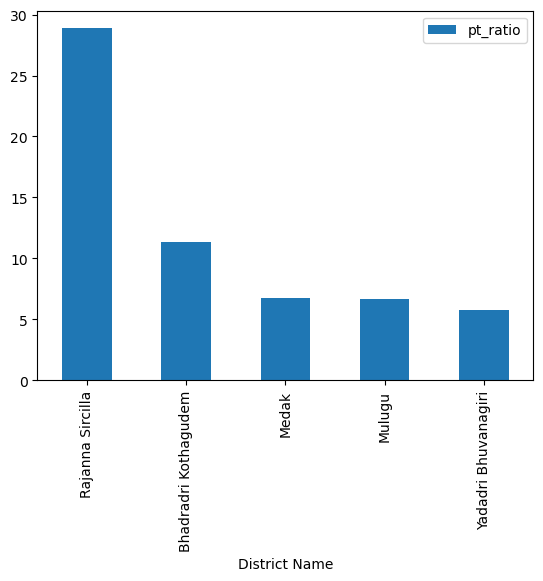

In [156]:
pop.head().plot("District Name","pt_ratio", kind="bar")

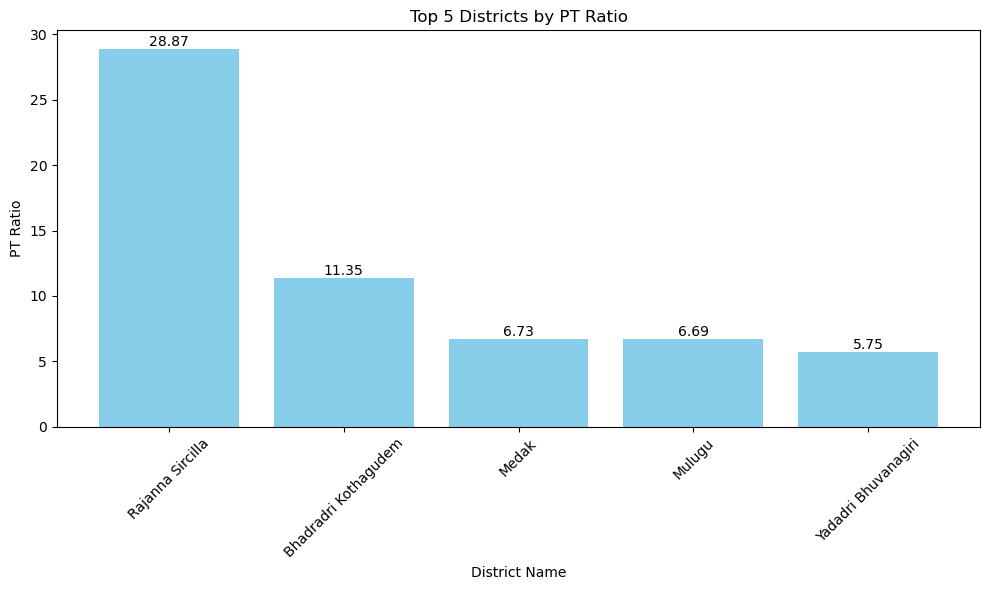

In [159]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called pop with 'District Name' and 'pt_ratio' columns

# Select the top 5 rows for plotting
top5_districts = pop.head()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(top5_districts["District Name"], top5_districts["pt_ratio"], color='skyblue')

# Adding labels and titles
plt.xlabel("District Name")
plt.ylabel("PT Ratio")
plt.title("Top 5 Districts by PT Ratio")

# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Adding data labels to the bars
for i, value in enumerate(top5_districts["pt_ratio"]):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()


In [157]:
pop.tail()

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors,Total_Visitors,pt_ratio
7,Kamareddy,972625,1054520,1027222,534,0,534,0.0
15,Medchal–Malkajgiri,2440073,2645527,2577043,0,0,0,0.0
28,Vikarabad,927140,1005205,979184,0,0,0,0.0
27,Suryapet,1099560,1192143,1161282,0,0,0,0.0
24,Ranga Reddy,2446265,2652241,2583583,0,0,0,0.0


<AxesSubplot:xlabel='District Name'>

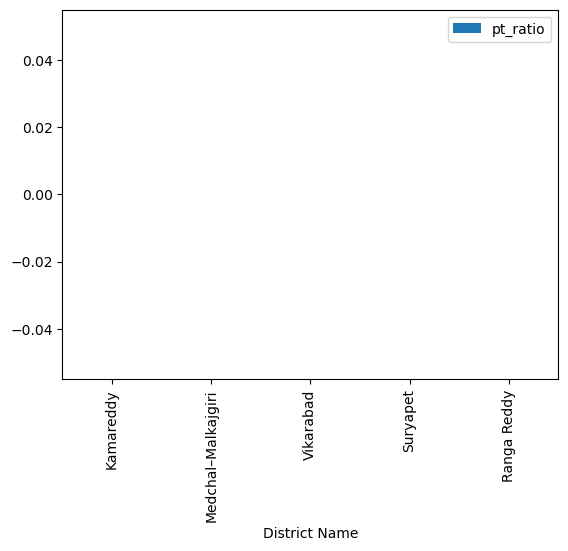

In [158]:
pop.tail().plot("District Name","pt_ratio", kind="bar")

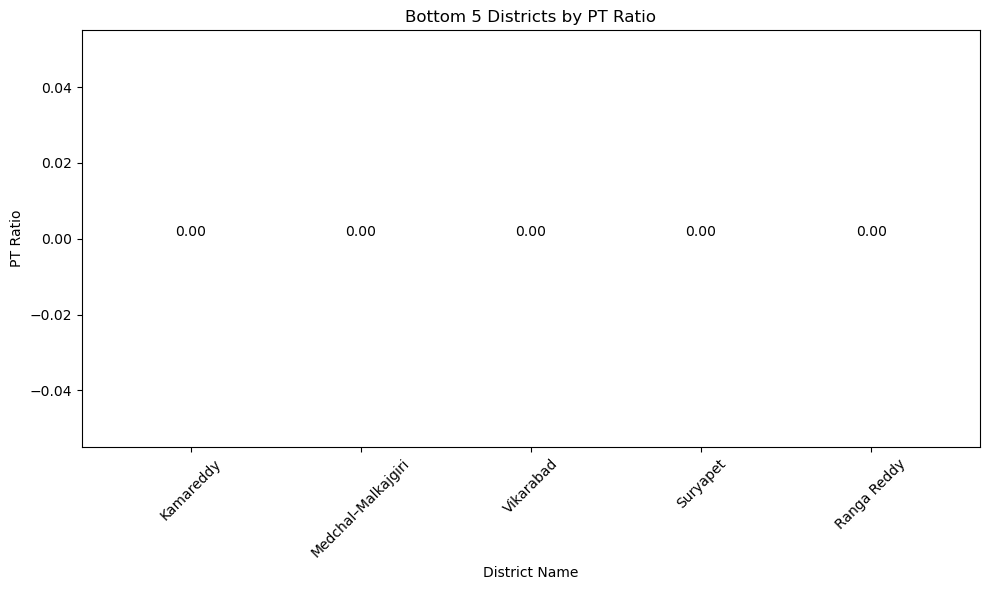

In [160]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called pop with 'District Name' and 'pt_ratio' columns

# Select the bottom 5 rows for plotting
tail5_districts = pop.tail()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(tail5_districts["District Name"], tail5_districts["pt_ratio"], color='salmon')

# Adding labels and titles
plt.xlabel("District Name")
plt.ylabel("PT Ratio")
plt.title("Bottom 5 Districts by PT Ratio")

# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Adding data labels to the bars
for i, value in enumerate(tail5_districts["pt_ratio"]):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()
